In [111]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [112]:
df = pd.read_csv('./data/cs-training.csv')

##Analysing the data consistency
First we check how much of the data is missing:

In [113]:
for c in df.columns[1:]:
    print c + ': %s' % (df[c].shape[0] - df[c].count().sum())

SeriousDlqin2yrs: 0
RevolvingUtilizationOfUnsecuredLines: 0
age: 0
NumberOfTime30-59DaysPastDueNotWorse: 0
DebtRatio: 0
MonthlyIncome: 29731
NumberOfOpenCreditLinesAndLoans: 0
NumberOfTimes90DaysLate: 0
NumberRealEstateLoansOrLines: 0
NumberOfTime60-89DaysPastDueNotWorse: 0
NumberOfDependents: 3924


Lets also see the number of rows with at least one missing date.

In [114]:
print 'number of rows with at least one missing date: ' + str(df.shape[0] - df.dropna().shape[0])

number of rows with at least one missing date: 29731


Number of people with financial distress.

In [115]:
print 'Number of people with financial distress: ' + str(df.loc[df.SeriousDlqin2yrs == 1].shape[0])

Number of people with financial distress: 10026


##Overall distribution of financially distressed clients

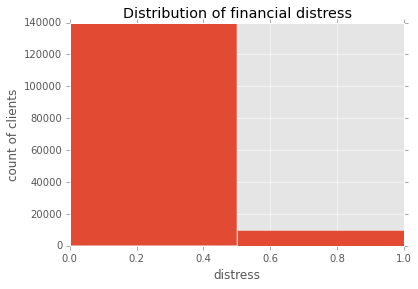

In [116]:
df.SeriousDlqin2yrs.plot(kind='hist', bins=2)
plt.title('Distribution of financial distress')
plt.xlabel('distress')
plt.ylabel('count of clients')

financially distressed clients:

In [117]:
proc = df.dropna()
100 * float(df.dropna().loc[df.dropna().SeriousDlqin2yrs == 1].shape[0]) / df.dropna().shape[0] 

6.948590243537404

__About 7% of all clients have encountered financial distress.__

##Analysing feature space

###RevolvingUtilizationOfUnsecuredLines

__Description__: _Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits._ 

The input is ranged [0,2]. Most of the data stays within the boundaries [0,1], a value above 1 indicates, that the credits have been overdrawn.

We had to limit the x-axis, since there were outliers distorting the plot.

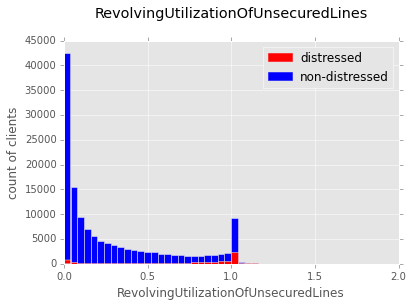

In [118]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='red')
plt.title('RevolvingUtilizationOfUnsecuredLines', y=1.08)
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 5000)

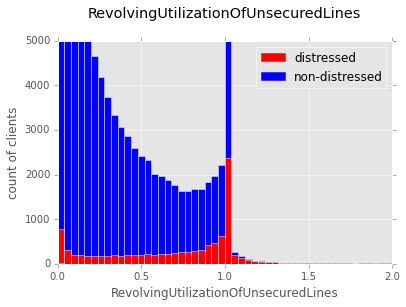

In [119]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.plot(kind='hist', bins=50, color='red')
plt.title('RevolvingUtilizationOfUnsecuredLines', y=1.08)
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,5000)  

It looks like borrowers are more likely to encounter distress with a higher 

In [121]:
print "Mode: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.mode()[0])
print "Mean: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.mean())
print "Median: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.median())

Mode: 0.0
Mean: 0.293224153813
Median: 0.132457336


In [122]:
print "Mode: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.mode()[0])
print "Mean: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.mean())
print "Median: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.RevolvingUtilizationOfUnsecuredLines < 2].RevolvingUtilizationOfUnsecuredLines.median())

Mode: 0.9999999
Mean: 0.700023488863
Median: 0.83494624


##DebtRatio

__Description:__ _Monthly debt payments, alimony,living costs divided by monthy gross income._

This value should also have a range of [0,1]. All samples values higher than the upper boundary of 1, represent clients whose monthly debt payments exceed their monthly income.

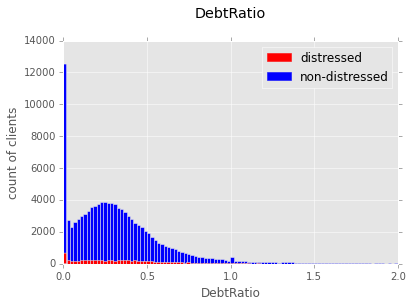

In [123]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='red')
plt.title('DebtRatio', y=1.08)
plt.xlabel('DebtRatio')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 500)

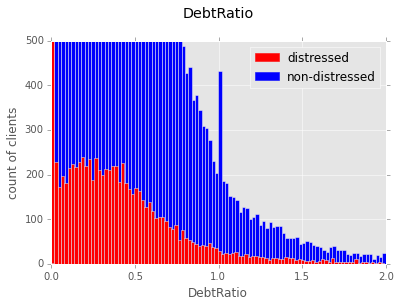

In [124]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio.plot(kind='hist', bins=100, color='red')
plt.title('DebtRatio', y=1.08)
plt.xlabel('DebtRatio')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,500)

However, we had to limit the plotted ratio to 2.0, since the larges value of this feature lies at:

In [125]:
print df.DebtRatio.max()

329664.0


which would distort the plot to much and seems rather unreal, so it might be an error. Of course as a next step in data wrangling we have to crop outliers, but since a baffling amount of

In [126]:
df.loc[df.DebtRatio > 2].DebtRatio.count()

31045

samples lies above 2.0, it is not that trivial to determine a rule of thumb for outlier elimination. It seems unlikely that more than a fifth of the samples is faulty. The data seems rather unbalanced in ths particular feature.

It's not that visible in the plots, but considering the mean and median, i.e. distressed:

In [127]:
print "Mean: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio.mean())
print "Median: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.DebtRatio < 2].DebtRatio.median())

Mean: 0.330567992607
Median: 0.281137754


and non-distressed:

In [128]:
print "Mean: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio.mean())
print "Median: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.DebtRatio < 2].DebtRatio.median())

Mean: 0.411282121894
Median: 0.344811491


a higher debt ratio indicates a higher chance of distress.

##MonthlyIncome

__Description:__ _Monthly income._



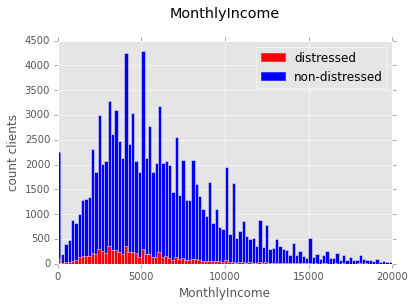

In [129]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.MonthlyIncome < 20000].MonthlyIncome.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.MonthlyIncome < 20000].MonthlyIncome.plot(kind='hist', bins=100, color='red')
plt.title('MonthlyIncome', y=1.08)
plt.xlabel('MonthlyIncome')
plt.ylabel('count clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

In [130]:
print "Mode: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.MonthlyIncome < 20000].MonthlyIncome.mode()[0])
print "Mean: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.MonthlyIncome < 20000].MonthlyIncome.mean())
print "Median: " + str(df.loc[df.SeriousDlqin2yrs == 0].loc[df.MonthlyIncome < 20000].MonthlyIncome.median())

Mode: 5000.0
Mean: 6072.24517793
Median: 5399.0


In [131]:
print "Mode: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.MonthlyIncome < 20000].MonthlyIncome.mode()[0])
print "Mean: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.MonthlyIncome < 20000].MonthlyIncome.mean())
print "Median: " + str(df.loc[df.SeriousDlqin2yrs == 1].loc[df.MonthlyIncome < 20000].MonthlyIncome.median())

Mode: 3000.0
Mean: 5186.20507528
Median: 4470.5


##Age
__Description__: _Age._

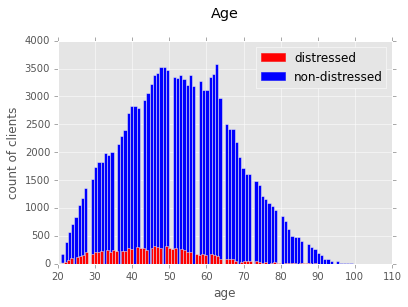

In [132]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.age >= 20].age.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.age >= 20].age.plot(kind='hist', bins=100, color='red')
plt.title('Age', y=1.08)
plt.xlabel('age')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

Well here we don't need to consider the mean, mode or median, the shift in this distribution is quite noticeable: younger borrowers are more likely to have payment problems.

##NumberOfOpenCreditLinesAndLoans


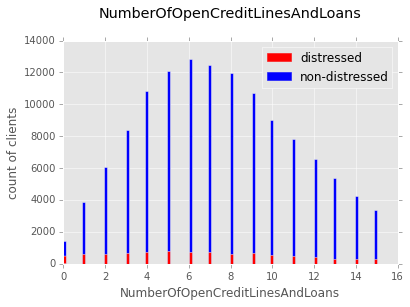

In [133]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=100, color='red')
plt.title('NumberOfOpenCreditLinesAndLoans', y=1.08)
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 1000)

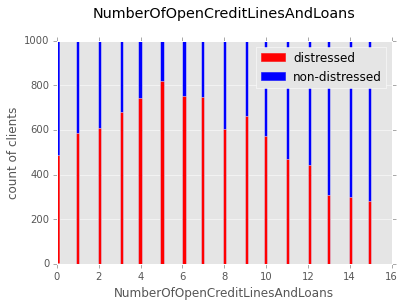

In [134]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.NumberOfOpenCreditLinesAndLoans <= 15].NumberOfOpenCreditLinesAndLoans.plot(kind='hist', bins=100, color='red')
plt.title('NumberOfOpenCreditLinesAndLoans', y=1.08)
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,1000)

##NumberOfTimes90DaysLate


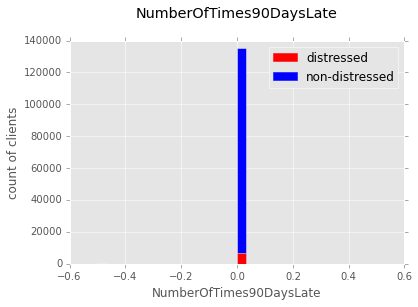

In [135]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.NumberOfTimes90DaysLate < 0.0001].NumberOfTimes90DaysLate.plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.NumberOfTimes90DaysLate < 0.0001].NumberOfTimes90DaysLate.plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTimes90DaysLate', y=1.08)
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])


In [136]:
df.loc[df.NumberOfTimes90DaysLate == 98].NumberOfTimes90DaysLate.count()

264

(0, 98)

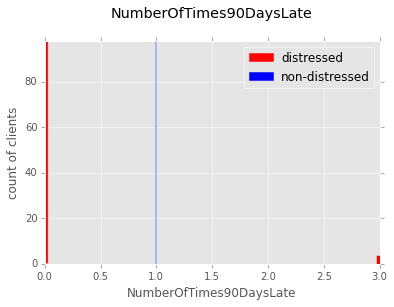

In [137]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df.NumberOfTimes90DaysLate ].NumberOfTimes90DaysLate.plot(kind='hist', bins=100, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df.NumberOfTimes90DaysLate ].NumberOfTimes90DaysLate.plot(kind='hist', bins=100, color='red')
plt.title('NumberOfTimes90DaysLate', y=1.08)
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,98)

##NumberOfTime30-59DaysPastDueNotWorse


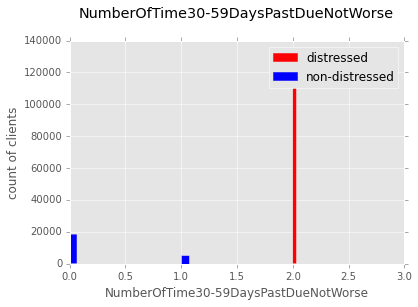

In [138]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df['NumberOfTime30-59DaysPastDueNotWorse']]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df['NumberOfTime30-59DaysPastDueNotWorse']]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime30-59DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])


(0, 1)

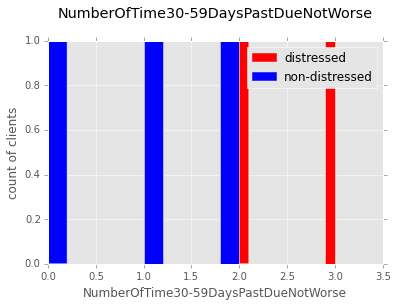

In [139]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df['NumberOfTime30-59DaysPastDueNotWorse']]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=10, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df['NumberOfTime30-59DaysPastDueNotWorse']]['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', bins=10, color='red')
plt.title('NumberOfTime30-59DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,1)

##NumberOfTime60-89DaysPastDueNotWorse


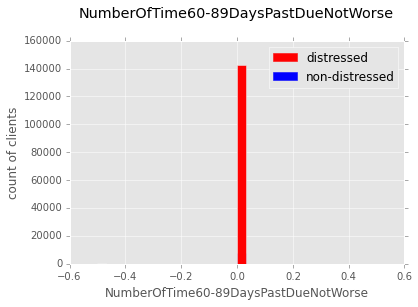

In [140]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df['NumberOfTime60-89DaysPastDueNotWorse']]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df['NumberOfTime60-89DaysPastDueNotWorse']]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime60-89DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

(0, 11)

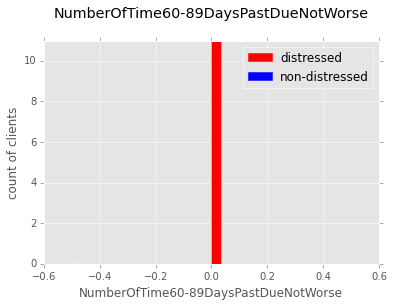

In [141]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df['NumberOfTime60-89DaysPastDueNotWorse']]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df['NumberOfTime60-89DaysPastDueNotWorse']]['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfTime60-89DaysPastDueNotWorse', y=1.08)
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])
plt.ylim(0,11)

##NumberRealEstateLoansOrLines


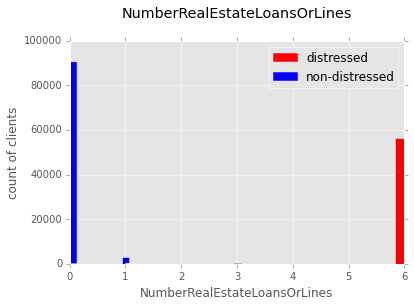

In [142]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df['NumberRealEstateLoansOrLines']]['NumberRealEstateLoansOrLines'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df['NumberRealEstateLoansOrLines']]['NumberRealEstateLoansOrLines'].plot(kind='hist', bins=30, color='red')
plt.title('NumberRealEstateLoansOrLines', y=1.08)
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])

##NumberOfDependents

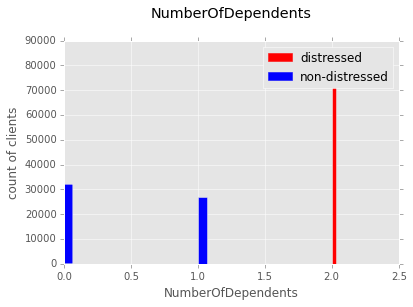

In [143]:
df.loc[df.SeriousDlqin2yrs == 0].loc[df['NumberOfDependents']]['NumberOfDependents'].plot(kind='hist', bins=30, color='blue')
df.loc[df.SeriousDlqin2yrs == 1].loc[df['NumberOfDependents']]['NumberOfDependents'].plot(kind='hist', bins=30, color='red')
plt.title('NumberOfDependents', y=1.08)
plt.xlabel('NumberOfDependents')
plt.ylabel('count of clients')
red = mpatches.Patch(color='red', label='distressed')
blue = mpatches.Patch(color='blue', label='non-distressed')
plt.legend(handles=[red, blue])